## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [5]:
model = build_mlp()

In [7]:
"""
Compile 模型
"""
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001, momentum=0.95)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [8]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 6s 124us/step - loss: 2.0353 - accuracy: 0.2687 - val_loss: 1.8573 - val_accuracy: 0.3441
Epoch 2/500
50000/50000 [==============================] - 6s 120us/step - loss: 1.8155 - accuracy: 0.3578 - val_loss: 1.7582 - val_accuracy: 0.3849
Epoch 3/500
50000/50000 [==============================] - 6s 113us/step - loss: 1.7379 - accuracy: 0.3889 - val_loss: 1.7017 - val_accuracy: 0.4058
Epoch 4/500
50000/50000 [==============================] - 7s 141us/step - loss: 1.6811 - accuracy: 0.4072 - val_loss: 1.6446 - val_accuracy: 0.4246
Epoch 5/500
50000/50000 [==============================] - 6s 119us/step - loss: 1.6290 - accuracy: 0.4274 - val_loss: 1.6117 - val_accuracy: 0.4291
Epoch 6/500
50000/50000 [==============================] - 6s 118us/step - loss: 1.5882 - accuracy: 0.4412 - val_loss: 1.5861 - val_accuracy: 0.4421
Epoch 7/500
50000/50000 [==============================]

50000/50000 [==============================] - 5s 110us/step - loss: 0.9023 - accuracy: 0.6837 - val_loss: 1.3628 - val_accuracy: 0.5382
Epoch 56/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.9009 - accuracy: 0.6828 - val_loss: 1.3614 - val_accuracy: 0.5371
Epoch 57/500
50000/50000 [==============================] - 5s 105us/step - loss: 0.8771 - accuracy: 0.6949 - val_loss: 1.3568 - val_accuracy: 0.5361
Epoch 58/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.8730 - accuracy: 0.6954 - val_loss: 1.3670 - val_accuracy: 0.5357
Epoch 59/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.8597 - accuracy: 0.6986 - val_loss: 1.3556 - val_accuracy: 0.5449
Epoch 60/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.8522 - accuracy: 0.7034 - val_loss: 1.3463 - val_accuracy: 0.5442
Epoch 61/500
50000/50000 [==============================] - 5s 109us/step - loss: 0.8242 - accuracy: 0.7133 - val

50000/50000 [==============================] - 5s 100us/step - loss: 0.3938 - accuracy: 0.8697 - val_loss: 1.7953 - val_accuracy: 0.5346
Epoch 110/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.4119 - accuracy: 0.8595 - val_loss: 1.8091 - val_accuracy: 0.5351
Epoch 111/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.4090 - accuracy: 0.8606 - val_loss: 1.8604 - val_accuracy: 0.5238
Epoch 112/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.3904 - accuracy: 0.8674 - val_loss: 1.8616 - val_accuracy: 0.5300
Epoch 113/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.3772 - accuracy: 0.8723 - val_loss: 1.7847 - val_accuracy: 0.5358
Epoch 114/500
50000/50000 [==============================] - 5s 102us/step - loss: 0.3813 - accuracy: 0.8692 - val_loss: 1.8613 - val_accuracy: 0.5296
Epoch 115/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.3736 - accuracy: 0.8744

50000/50000 [==============================] - 7s 138us/step - loss: 0.1347 - accuracy: 0.9589 - val_loss: 2.7320 - val_accuracy: 0.5253
Epoch 164/500
50000/50000 [==============================] - 7s 147us/step - loss: 0.1353 - accuracy: 0.9587 - val_loss: 2.5804 - val_accuracy: 0.5285
Epoch 165/500
50000/50000 [==============================] - 7s 137us/step - loss: 0.1290 - accuracy: 0.9615 - val_loss: 2.5990 - val_accuracy: 0.5332
Epoch 166/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.1244 - accuracy: 0.9632 - val_loss: 2.7181 - val_accuracy: 0.5289
Epoch 167/500
50000/50000 [==============================] - 7s 131us/step - loss: 0.1235 - accuracy: 0.9626 - val_loss: 2.6428 - val_accuracy: 0.5391
Epoch 168/500
50000/50000 [==============================] - 5s 104us/step - loss: 0.1030 - accuracy: 0.9717 - val_loss: 2.6810 - val_accuracy: 0.5336
Epoch 169/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.1181 - accuracy: 0.9650

50000/50000 [==============================] - 6s 119us/step - loss: 0.0114 - accuracy: 0.9992 - val_loss: 3.2943 - val_accuracy: 0.5445
Epoch 218/500
50000/50000 [==============================] - 6s 120us/step - loss: 0.0124 - accuracy: 0.9991 - val_loss: 3.3053 - val_accuracy: 0.5371
Epoch 219/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0121 - accuracy: 0.9991 - val_loss: 3.3257 - val_accuracy: 0.5376
Epoch 220/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0130 - accuracy: 0.9987 - val_loss: 3.3304 - val_accuracy: 0.5349
Epoch 221/500
50000/50000 [==============================] - 5s 106us/step - loss: 0.0105 - accuracy: 0.9994 - val_loss: 3.3556 - val_accuracy: 0.5352
Epoch 222/500
50000/50000 [==============================] - 5s 107us/step - loss: 0.0105 - accuracy: 0.9993 - val_loss: 3.3532 - val_accuracy: 0.5427
Epoch 223/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0113 - accuracy: 0.9989

50000/50000 [==============================] - 5s 105us/step - loss: 0.0036 - accuracy: 1.0000 - val_loss: 3.6912 - val_accuracy: 0.5383
Epoch 272/500
50000/50000 [==============================] - 6s 115us/step - loss: 0.0034 - accuracy: 0.9999 - val_loss: 3.6996 - val_accuracy: 0.5415
Epoch 273/500
50000/50000 [==============================] - 6s 116us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.7013 - val_accuracy: 0.5422
Epoch 274/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0035 - accuracy: 1.0000 - val_loss: 3.7059 - val_accuracy: 0.5406
Epoch 275/500
50000/50000 [==============================] - 6s 121us/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 3.7078 - val_accuracy: 0.5380
Epoch 276/500
50000/50000 [==============================] - 6s 114us/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 3.7183 - val_accuracy: 0.5378
Epoch 277/500
50000/50000 [==============================] - 6s 119us/step - loss: 0.0033 - accuracy: 1.0000

50000/50000 [==============================] - 5s 107us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.9149 - val_accuracy: 0.5391
Epoch 326/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 3.9148 - val_accuracy: 0.5402
Epoch 327/500
50000/50000 [==============================] - 7s 143us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.9185 - val_accuracy: 0.5397
Epoch 328/500
50000/50000 [==============================] - 6s 123us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.9239 - val_accuracy: 0.5391
Epoch 329/500
50000/50000 [==============================] - 6s 125us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.9314 - val_accuracy: 0.5400
Epoch 330/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 3.9310 - val_accuracy: 0.5383
Epoch 331/500
50000/50000 [==============================] - 7s 134us/step - loss: 0.0018 - accuracy: 1.0000

50000/50000 [==============================] - 6s 120us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0710 - val_accuracy: 0.5398
Epoch 380/500
50000/50000 [==============================] - 6s 110us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0801 - val_accuracy: 0.5382
Epoch 381/500
50000/50000 [==============================] - 6s 113us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0763 - val_accuracy: 0.5396
Epoch 382/500
50000/50000 [==============================] - 6s 112us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0794 - val_accuracy: 0.5398
Epoch 383/500
50000/50000 [==============================] - 6s 129us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0794 - val_accuracy: 0.5384
Epoch 384/500
50000/50000 [==============================] - 6s 127us/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 4.0846 - val_accuracy: 0.5386
Epoch 385/500
50000/50000 [==============================] - 5s 108us/step - loss: 0.0013 - accuracy: 1.0000

50000/50000 [==============================] - 5s 102us/step - loss: 0.0010 - accuracy: 1.0000 - val_loss: 4.1962 - val_accuracy: 0.5391
Epoch 434/500
50000/50000 [==============================] - 6s 120us/step - loss: 9.9835e-04 - accuracy: 1.0000 - val_loss: 4.1960 - val_accuracy: 0.5392
Epoch 435/500
50000/50000 [==============================] - 5s 108us/step - loss: 9.9194e-04 - accuracy: 1.0000 - val_loss: 4.1997 - val_accuracy: 0.5393
Epoch 436/500
50000/50000 [==============================] - 6s 129us/step - loss: 9.9174e-04 - accuracy: 1.0000 - val_loss: 4.2035 - val_accuracy: 0.5383
Epoch 437/500
50000/50000 [==============================] - 7s 134us/step - loss: 9.8391e-04 - accuracy: 1.0000 - val_loss: 4.2051 - val_accuracy: 0.5385
Epoch 438/500
50000/50000 [==============================] - 7s 140us/step - loss: 9.8283e-04 - accuracy: 1.0000 - val_loss: 4.2119 - val_accuracy: 0.5396
Epoch 439/500
50000/50000 [==============================] - 6s 130us/step - loss: 9.751

Epoch 486/500
50000/50000 [==============================] - 5s 107us/step - loss: 8.0999e-04 - accuracy: 1.0000 - val_loss: 4.2947 - val_accuracy: 0.5389
Epoch 487/500
50000/50000 [==============================] - 5s 101us/step - loss: 8.0593e-04 - accuracy: 1.0000 - val_loss: 4.2987 - val_accuracy: 0.5394
Epoch 488/500
50000/50000 [==============================] - 5s 103us/step - loss: 7.9967e-04 - accuracy: 1.0000 - val_loss: 4.2981 - val_accuracy: 0.5389
Epoch 489/500
50000/50000 [==============================] - 5s 103us/step - loss: 8.0132e-04 - accuracy: 1.0000 - val_loss: 4.3021 - val_accuracy: 0.5393
Epoch 490/500
50000/50000 [==============================] - 7s 146us/step - loss: 7.9553e-04 - accuracy: 1.0000 - val_loss: 4.3018 - val_accuracy: 0.5389
Epoch 491/500
50000/50000 [==============================] - 8s 161us/step - loss: 7.9032e-04 - accuracy: 1.0000 - val_loss: 4.3025 - val_accuracy: 0.5391
Epoch 492/500
50000/50000 [==============================] - 6s 119us/

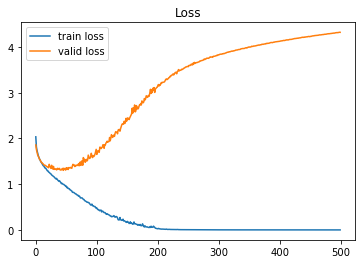

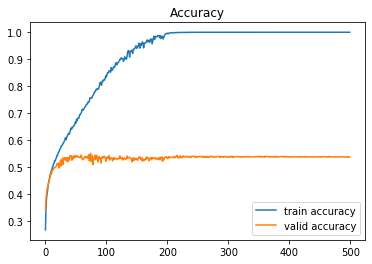

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()